In [1]:
import geopandas as gpd

/tmp/ipykernel_3217652/3841419929.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
freeways = gpd.read_file("data/385/latimesfreeway/socal_freeways.shp")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


In [3]:
freeways.shape

(1, 2)

<Axes: >

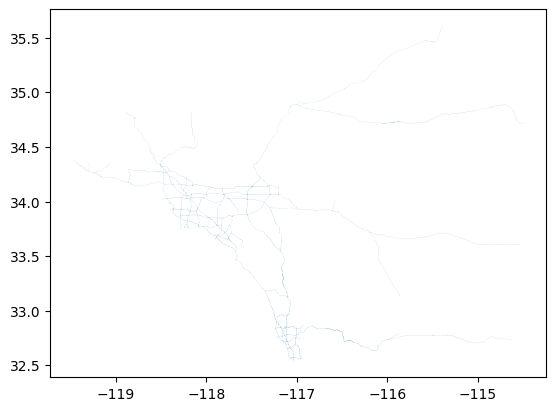

In [4]:
freeways.plot()

In [5]:
freeways.total_bounds

array([-119.477874  ,   32.54237013, -114.48779143,   35.60739551])

In [6]:
freeways.explore()

In [7]:
blocks = gpd.read_file("data/385/latimesfreeway/blocks_2010_1000_clipped.shp")

In [8]:
blocks.shape

(55699, 20)

In [9]:
blocks.head()

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE10          GEOID10      NAME10  \
0        06        025    011300      1138  060250113001138  Block 1138   
1        06        025    011300      1147  060250113001147  Block 1147   
2        06        025    011300      2038  060250113002038  Block 2038   
3        06        025    010800      1339  060250108001339  Block 1339   
4        06        025    010800      1361  060250108001361  Block 1361   

  MTFCC10 UR10 UACE10 UATYP10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0   G5040    R    NaN     NaN          S   396163         0  +32.7764896   
1   G5040    R    NaN     NaN          S   138122         0  +32.7760471   
2   G5040    U  26416       U          S   622695         0  +32.7778665   
3   G5040    R    NaN     NaN          S   388117         0  +32.7777282   
4   G5040    R    NaN     NaN          S   487332         0  +32.7688809   

     INTPTLON10   area1000  pop_orig  area_orig  pop1000  \
0  -115.4795745  280072.89       0.0  396566.66      0.0   
1  -115.4630197   90661.78       0.0  138262.69      0.0   
2  -115.5308846  246426.35      13.0  623328.50      5.0   
3  -115.3486846  110607.16       0.0  388511.23      0.0   
4  -115.2813359  368020.31       0.0  487832.82      0.0   

                                            geometry  
0  POLYGON ((-115.47398 32.77775, -115.47398 32.7...  
1  POLYGON ((-115.46094 32.77654, -115.46094 32.7...  
2  POLYGON ((-115.52652 32.77695, -115.52651 32.7...  
3  POLYGON ((-115.34569 32.77649, -115.34568 32.7...  
4  POLYGON ((-115.27346 32.76644, -115.27401 32.7...

In [10]:
blocks.pop_orig.sum()

4383504.0

In [11]:
blocks.pop1000.sum()

2566784.0

In [12]:
den = blocks.pop_orig + (1 * blocks.pop_orig==0)

In [13]:
blocks['pct_in'] = blocks.pop1000 / den

In [14]:
blocks.pct_in.describe()

count    55630.000000
mean         0.359840
std          0.437537
min          0.000000
25%          0.000000
50%          0.000000
75%          0.970588
max          1.000000
Name: pct_in, dtype: float64

blocks.explore()

In [15]:
blocks.pop1000.sum()/blocks.pop_orig.sum() * 100

58.555530005219566

Fifty-nine perrcent of the population residing in tracts that intersect the 1000 foot freeway buffer are estimated to reside inside 1000 feet of the freeway.